In [64]:
from alprLib.Yolo import Yolo
from alprLib.EasyOCR import Reader
import cv2
from matplotlib import pyplot as plt
import time
import numpy as np
import os

## Initialization

In [65]:
reader = Reader()
yolo = Yolo(weight_path='./yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.weights', config_path='./yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.cfg')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Initializing EasyOCR...
EasyOCR initialized.
Initializing Yolo...
Using weights: ./yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.weights
Using config: ./yolo_weights/eu_dataset_256_160_extended2_10k/yolov4-tiny.cfg
Using dims: (256, 160)
Yolo initialized.


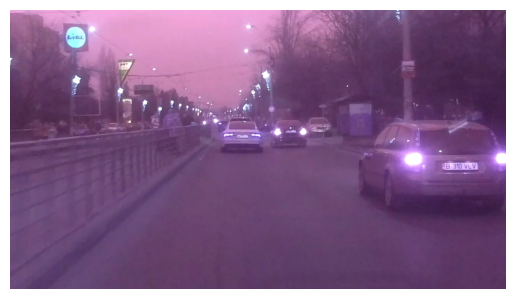

In [66]:
#img = cv2.imread("./eu_dataset/images/dayride_type1_001#t=894.jpg")
# random image from ./eu_dataset/images/
image_name = os.listdir("./eu_dataset/images/")[np.random.randint(0, len(os.listdir("./eu_dataset/images/")))]
img = cv2.imread("./eu_dataset/images/" + image_name)
plt.axis('off')
plt.imshow(img)

## Plate detection with Yolo Tiny v4

In [67]:
t0 = time.time()
bboxes = yolo.find_bboxes(img)
t1 = time.time()

print("Inference time: ", t1-t0)
bboxes

Inference time:  0.052741289138793945


[[1106, 390, 107, 26], [579, 319, 36, 11]]

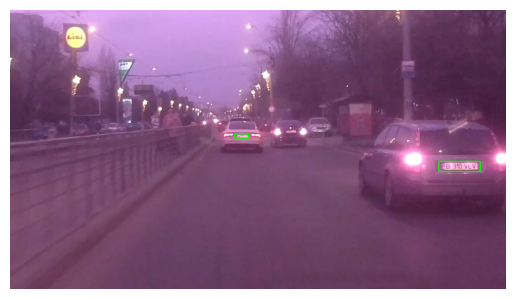

In [68]:
display_img = img.copy()

for box in bboxes:
    x, y, w, h = box
    cv2.rectangle(display_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(display_img[:,:,::-1])
plt.axis('off')
plt.show()

(26, 107, 3)


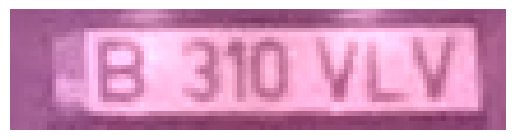

(11, 36, 3)


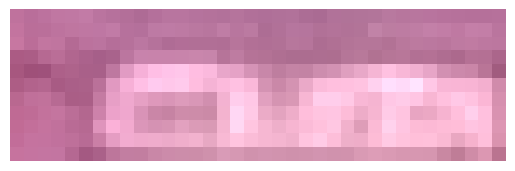

In [69]:
rois = [img[y:y+h, x:x+w] for x, y, w, h in bboxes]

# only show the license plate
for roi in rois:
    plt.imshow(roi[:,:,::-1])
    print(roi.shape)
    plt.axis('off')
    plt.show()

## TODO: perspective correction

## OCR with EasyOCR

In [70]:
results = []

for roi in rois:
    # if x dimension is less than 100px, skip
    print(roi.shape)
    if roi.shape[1] < 60:
        continue
    t0 = time.time()
    results.append(reader.read(roi, True))
    t1 = time.time()

    print("Inference time: ", t1-t0)

print(results)

(26, 107, 3)
[([[8, 1], [123, 1], [123, 30], [8, 30]], 'F8 HVM', 0.16902613647453155)]
Inference time:  0.06292414665222168
(11, 36, 3)
['F8 HVM']
